## Spectral Clustering on Iris Dataset

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv")

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<b> Conclusion: </b> No null values in the dataset<br>
<b>Depended Variable </b> Class<br>
<b> Independent Variable</b> Sepal Length width petal length width



In [ ]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

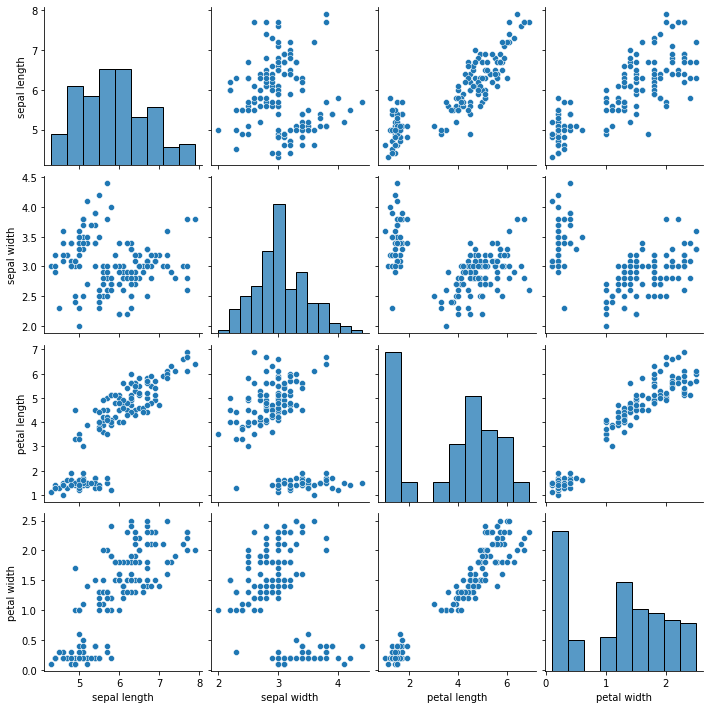

In [ ]:
sns.pairplot(df)

### Constructing Euclidean Matrix

In [ ]:
def euclidean(x,y):
  res = 0
  for i in range(len(x)):
    res+=(x[i]-y[i])**2
  return res**0.5

In [ ]:
X = np.array(df.drop(columns=["class"]))
eucd = np.zeros((X.shape[0],X.shape[0]))
for i in range(len(X)):
  for j in range(len(X)):
    eucd[i][j] = euclidean(X[i],X[j])

In [ ]:
d = []
for i in  eucd:
  d.append(np.count_nonzero(i))
d = np.diag(d)

In [ ]:
L = nx

In [ ]:
eigenValues, eigenVectors = np.linalg.eig(L)

In [ ]:
idx = eigenValues.argsort()
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

<b>Inference</b>:<br>
1. None of the eigenvalue is zero all are non zero with one negative value.
2. Since L is a symmetric matrix all eigen values are Real.

The second smallest eigenvalue λ2 tells you about the connectivity of the graph. If the graph has two disconnected components, λ2 = 0. And if λ2 is small, this suggests the graph is nearly disconnected, that it has two components that are not very connected to each other.

In [ ]:
print("Spectral Gap:",eigenValues[0])

Spectral Gap: -241.5664738776984


In [ ]:
fiedler_value = eigenValues[1]
fiedler_vector = eigenVectors[1]

In [ ]:
print("fiedler_value",fiedler_value)
print("--------------------------")
print("fiedler_vector",fiedler_vector)

fiedler_value 146.99999999999955
--------------------------
fiedler_vector [-8.95601845e-02 -1.70967806e-14 -6.05337004e-15 -1.58717200e-01
  1.63961176e-15  8.36968703e-05  9.21816689e-03  1.82865248e-02
 -1.39436488e-02  2.61831439e-01  2.61682591e-04 -1.62438306e-03
  4.29696467e-02  4.49526950e-01 -2.59494406e-01 -4.67821571e-01
  2.51326960e-03  2.17179988e-01  6.21317293e-02  1.24676524e-04
  2.50174112e-04  6.12441592e-05  6.33224339e-02  3.27937716e-04
 -5.10555634e-05  6.69413048e-05 -4.54780945e-05  3.76202352e-03
 -6.19427961e-02 -1.57479536e-04  1.84838633e-03 -6.75422729e-02
 -4.95766536e-03 -1.44376480e-02 -1.19793080e-04 -4.21556779e-04
  1.97770857e-04  2.32832067e-02  6.15323045e-05  4.78958128e-04
 -3.33441234e-02  1.83942662e-04  1.12621718e-01 -2.66883702e-03
 -6.96180754e-04  1.55180454e-03  1.00910822e-01  4.04631517e-04
  2.11970346e-04 -1.78051097e-02  3.29728645e-04  2.89760373e-04
 -5.46200404e-04 -3.26676333e-03 -3.23820061e-02  4.67670665e-04
 -2.78424546e-0

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
G = nx.from_numpy_matrix(eucd)

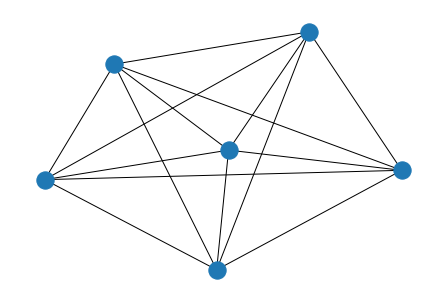

In [ ]:
nx.draw(G.subgraph([0,1,2,3,4,5]))

In [ ]:
nx.fiedler_vector(G)

array([-2.42096577e-04, -1.44011453e-04, -1.52642713e-04, -1.35936776e-04,
       -2.43787720e-04, -4.68996300e-04, -2.06170420e-04, -2.28237453e-04,
       -9.14131489e-05, -1.29695539e-04, -3.11647560e-04, -2.12843391e-04,
       -1.04649955e-04, -7.86888668e-05, -2.99509656e-04, -4.19237599e-04,
       -3.61912040e-04, -2.81272908e-04, -4.35087385e-04, -3.30358887e-04,
       -3.04488013e-04, -3.64589067e-04, -1.71883475e-04, -4.06425439e-04,
       -2.38448894e-04, -1.61744451e-04, -3.32532899e-04, -2.66764075e-04,
       -2.38245151e-04, -1.66336104e-04, -1.59357091e-04, -3.64899034e-04,
       -2.82769234e-04, -3.26872743e-04, -1.29695539e-04, -1.72445171e-04,
       -2.62659089e-04, -1.29695539e-04, -1.04224398e-04, -2.40032902e-04,
       -2.54540407e-04, -4.82436253e-05, -1.28624035e-04, -4.41766194e-04,
       -4.73202486e-04, -1.67848455e-04, -3.06042190e-04, -1.47896716e-04,
       -3.02305747e-04, -2.02509147e-04, -1.16657261e-03, -1.15575329e-02,
       -9.57003496e-04, -

## KNN

In [ ]:
knn = np.zeros((150,150))
for i in range(len(eucd)):
  idx = eucd[i].argsort()[:5]
  knn[i][idx] = 1

In [ ]:
D_knn = []
for i in knn:
  D_knn.append(sum(knn[1]))
D_knn = np.diag(D_knn)

In [ ]:
L = D_knn - knn

In [ ]:
knn_eig_value,knn_eig_vectors = np.linalg.eig(L)

In [ ]:
idx_knn = knn_eig_values.argsort()
knn_eig_values = knn_eig_values[idx_knn]
knn_eig_vectors = knn_eig_vectors[:,idx_knn]

In [ ]:
print("Fiedler Value",knn_eig_values[2])
print("Fiedler Vector",knn_eig_vectors[2])

Fiedler Value (0.009535869979487133+0j)
Fiedler Vector [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -1.41421356e-01+0.00000000e+00j  1.98494418e-01+0.00000000e+00j
  1.82170801e-01+0.00000000e+00j -1.22042689e-03+0.00000000e+00j
  2.73521920e-16+0.00000000e+00j -5.01372511e-02+0.00000000e+00j
  7.19992092e-02+0.00000000e+00j  3.05714165e-02+0.00000000e+00j
 -1.10433861e-02-1.20752326e-03j -1.10433861e-02+1.20752326e-03j
 -4.59784589e-15+0.00000000e+00j  3.02962807e-03+0.00000000e+00j
  2.02321221e-02-1.12439091e-02j  2.02321221e-02+1.12439091e-02j
 -2.02756067e-04+0.00000000e+00j -4.24959122e-02-3.20067095e-01j
 -4.24959122e-02+3.20067095e-01j  2.82639213e-02+0.00000000e+00j
  4.16971079e-15+0.00000000e+00j -3.13897524e-15+0.00000000e+00j
 -3.39206037e-02+0.00000000e+00j  6

<b>Inference</b>
1. First 2 eigen values are zero

In [ ]:
Gknn = nx.from_numpy_matrix(knn)

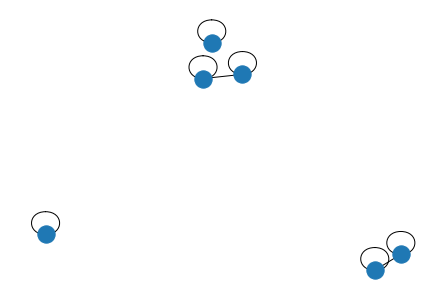

In [ ]:
nx.draw(Gknn.subgraph([0,1,2,3,4,5]))

In [ ]:
nx.algebraic_connectivity(Gknn)

0.0

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)